<a href="https://colab.research.google.com/github/EvanMcCormick37/Text-Mining-Research-Project-Spring-2024/blob/main/analysis/ExampleCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
from bs4 import BeautifulSoup
import re
import pandas as pd
import requests
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import requests
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#FILE OPERATION

In [ ]:
with open("/content/", "a") as new_file :
  new_file.write("")

In [ ]:
PathToMyCorpus="/content/"

MyFileNames = os.listdir(PathToMyCorpus)
print(MyFileNames)

In [ ]:
MyNewList=[]



for next_file_name in MyFileNames:
    CompleteFilePathName=PathToMyCorpus + "/" + next_file_name
    ## have a look: Looks good!
    print(CompleteFilePathName)
    ## Append each complete file path to your list
    MyNewList.append(CompleteFilePathName)

In [ ]:
soup = BeautifulSoup(Coffee_HTML.text,'html.parser')
soup

#API

In [ ]:
url = 'https://newsapi.org/v2/everything'

params = {'q': 'tinder AND bumble AND Online Dating',
    'apiKey': "",
          "language": "en"
               }

request = requests.get(url,params)


newsdata = request.json()

#Count Vectorizer

In [ ]:
MyCV1 = CountVectorizer(input = "content",
                        stop_words="english")
MyMat1 = MyCV1.fit_transform( content )
MyCols=MyCV1.get_feature_names_out()
DataFrame = pd.DataFrame(MyMat1.toarray(), columns=MyCols)

In [ ]:
MyCV2 = CountVectorizer(input = "filename", stop_words="english")
MyMat2 = MyCV12.fit_transform( MyNewList )
MyCols2=MyCV12.get_feature_names_out()
DataFrame = pd.DataFrame(MyMat2.toarray(), columns=MyCols2)

#LemmatizeR

In [ ]:
LEMMER = WordNetLemmatizer()

In [ ]:
def MY_LEMMER(str_input):
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [LEMMER.lemmatize(word) for word in words]
    return words

In [ ]:
MyVect_LEM=CountVectorizer(input='content',
                        analyzer = 'word',
                        stop_words='english',
                        tokenizer=MY_LEMMER,
                        lowercase = True,

                        )
Vect_LEM = MyVect_LEM.fit_transform(data["description"].str.lower().tolist())
ColumnNames_lem=MyVect_LEM.get_feature_names_out()
CorpusDF_LEM=pd.DataFrame(Vect_LEM.toarray(),columns=ColumnNames_lem)
CorpusDF_LEM

# Data Cleaning

In [ ]:
count = 0
for i in DataFrame.columns:
  if len(i) <= 2:
    count = count +1
    DataFrame.drop(i, axis=1, inplace = True)

print(count)

In [ ]:
my_stop_word =["article", "account"]

In [ ]:
for i in my_stop_word:
  DataFrame.drop(i, axis=1, inplace = True)

In [ ]:
for i in CorpusDF_LEM.columns:
  if len(i) <= 2:
    CorpusDF_LEM.drop(i, axis = 1, inplace = True)
  elif(re.search(r'[^A-Za-z]+', i)):
    CorpusDF_LEM.drop(i, axis = 1, inplace = True)

#Stemming

In [ ]:
def MY_STEMMER(str_input):
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [STEMMER.stem(word) for word in words]
    return words

In [ ]:
MyVect_STEM=CountVectorizer(input='content',
                        analyzer = 'word',
                        stop_words='english',
                        tokenizer=MY_STEMMER,
                        lowercase = True,

                        )

In [ ]:
Vect_Stem = MyVect_STEM.fit_transform(data["description"].str.lower().tolist())
ColumnNames_s=MyVect_STEM.get_feature_names_out()
CorpusDF_Stem=pd.DataFrame(Vect_Stem.toarray(),columns=ColumnNames_s)
CorpusDF_Stem

#TFIDF

In [ ]:
MyVect_TF=TfidfVectorizer(input='content', stop_words="english")
Vect = MyVect_TF.fit_transform(data["description"])
ColumnNamesTF=MyVect_TF.get_feature_names_out()
CorpusDF_TF=pd.DataFrame(Vect.toarray(),columns=ColumnNamesTF)
CorpusDF_TF

# Word Cloud

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have imported necessary libraries and DataFrame is available

# Filter DataFrame for topics related to "java"
DataCopy = Df[Df["label"] == "Bitcoin"].copy()

# Combine all text data into a single string
text = ' '.join(DataCopy["Title"])  # Replace 'text' with the actual column containing text

# Generate WordCloud object
word_cloud = WordCloud(width=1000, height=600, background_color="white",
                       min_word_length=4, max_words=200).generate(text)

# Display the WordCloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


#Clustering

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.spatial import distance_matrix

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
data1 = pd.read_csv("/content/Wholedata.csv")

In [ ]:
data1.dropna(inplace=True)

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data1[features])

In [ ]:
k = 2

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, algorithm= "lloyd")
data1['cluster'] = kmeans.fit_predict(data_scaled)


cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_labels = kmeans.labels_

##Mapping Cluster_labels and known Labels

In [ ]:
data_class =["Control Campaign","Test Campaign"]
dc =dict(zip(data_class,range(0,2)))
print(dc)

In [ ]:
data1["mapped"] = data1["Campaign Name"]

In [ ]:
data1["mapped"] = data1["mapped"].map(dc)

#Silhouette Score

In [ ]:
Silhouette_Score =[]
for i in range(2,7):

  kmeans = KMeans(n_clusters=i, algorithm= "lloyd",n_init='auto')
  data1['cluster'] = kmeans.fit_predict(data_scaled)
  Silhouette_Score.append(silhouette_score(data_scaled, data1["cluster"]))
  cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
  print("for I=",i,silhouette_score(data_scaled, data1["cluster"]))

## Plot of Silhouette Score

In [ ]:
plt.plot([2,3,4,5,6], Silhouette_Score)
plt.title("Using Silhouette Score")

# WCSS Score

In [ ]:
wcss =[]
for i in range(1, 6):
    kmeans = KMeans(n_clusters = i, n_init='auto', random_state = 42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 6), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title("Using Elbow Method")
plt.show()

# Distance Matrix

In [ ]:
df = pd.DataFrame(distance_matrix(dataset.values, dataset.values), index=dataset.index, columns=dataset.index)
df =df.where(np.tril(np.ones(df.shape)).astype(np.bool))

In [ ]:
newd = df.iloc[0:5,0:5]
newd = newd.append(df.iloc[54:59,0:5])

## Distance Matrix as Heat Map

In [ ]:
plt.figure(figsize=(20, 8))
sns.heatmap(newd, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)
plt.title('Clutering Distance Matrix')
plt.show()

 # Latent Dirichlet Allocation

In [ ]:
data = pd.read_csv("/content/Taahaa_LabeledReviews.csv")

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
data.head()

,label,reviews
0,pos,very good apple
1,pos,very good and sweet banana
2,pos,very good and tangy mosumbi
3,neg,bad orange and too sour
4,neg,bad apple too hard to chew


In [ ]:
MyCountV=CountVectorizer(
        input="content",  ## because we have a csv file
        lowercase=True,
        stop_words = "english",
        max_features=50
        )
MyDTM = MyCountV.fit_transform(data["reviews"])  # create a sparse matrix


In [ ]:
ColumnNames=MyCountV.get_feature_names_out()

#### do not use this line if you want use **PyldaViz but you might want to use it for creating a data frame

In [ ]:
MyDTM1 = MyDTM.toarray()


In [ ]:
MyDTM1

array([[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0]])

In [ ]:

MyDTM_DF= pd.DataFrame(MyDTM1,columns=ColumnNames)
print(type(MyDTM))
My_Orig_DF=MyDTM_DF

<class 'scipy.sparse._csr.csr_matrix'>


In [ ]:
My_Orig_DF

,apple,bad,banana,chew,good,hard,mosumbi,orange,sour,sweet,tangy
0,1,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0
2,0,0,0,0,1,0,1,0,0,0,1
3,0,1,0,0,0,0,0,1,1,0,0
4,1,1,0,1,0,1,0,0,0,0,0


In [ ]:
NUM_TOPICS= 2
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=1000, learning_method='online')
#lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')


lda_Z_DF = lda_model.fit_transform(My_Orig_DF)
print(lda_Z_DF.shape)  # (NO_DOCUMENTS, NO_TOPICS)

def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                    for i in topic.argsort()[:-top_n - 1:-1]])

print("LDA Model:")
print_topics(lda_model, MyCountV)



# ## conda install -c conda-forge pyldavis


(5, 2)
LDA Model:
Topic 0:
[('good', 3.3726504178374865), ('mosumbi', 1.4891291129397766), ('tangy', 1.4891291119090726), ('banana', 1.4891290568814486), ('sweet', 1.4891290565795046), ('orange', 1.4744983726507508), ('sour', 1.4744983692806373), ('bad', 1.3346798875211388), ('apple', 0.557743140013315), ('chew', 0.5039619571705035)]
Topic 1:
[('apple', 2.442256858344458), ('bad', 1.6653201111159133), ('chew', 1.4960380429656575), ('hard', 1.4960380428780071), ('good', 0.627349578936847), ('sour', 0.5255016309274531), ('orange', 0.5255016272044893), ('sweet', 0.5108709435332109), ('banana', 0.5108709429284406), ('tangy', 0.5108708882587223)]


### Fancy Plot

In [ ]:
!pip install pyLDAvis

In [ ]:
vocab = MyCountV.get_feature_names_out()

In [ ]:
print_topics(lda_model, MyCountV)

Topic 0:
[('good', 2.5245757326467664), ('apple', 2.4844206767884596), ('chew', 1.4901080471825041), ('hard', 1.4899554273121765), ('banana', 1.4881565522420148), ('sweet', 1.4880348801326042), ('bad', 1.4804132716826466), ('mosumbi', 0.5102423962193531), ('tangy', 0.5102178666986577), ('orange', 0.5074455168357385)]
Topic 1:
[('bad', 1.518897464668238), ('sour', 1.4926071264935077), ('orange', 1.4926028041541493), ('tangy', 1.489839312415584), ('mosumbi', 1.4897727752187164), ('good', 1.4739701649228096), ('apple', 0.5146940705169335), ('sweet', 0.5119352456101198), ('banana', 0.5117629551626985), ('hard', 0.5101092458472551)]


In [ ]:
lda_model.components_.tolist()

[[2.4844206767884596,
  1.4804132716826466,
  1.4881565522420148,
  1.4901080471825041,
  2.5245757326467664,
  1.4899554273121765,
  0.5102423962193531,
  0.5074455168357385,
  0.5072461832997788,
  1.4880348801326042,
  0.5102178666986577],
 [0.5146940705169335,
  1.518897464668238,
  0.5117629551626985,
  0.5098889408603392,
  1.4739701649228096,
  0.5101092458472551,
  1.4897727752187164,
  1.4926028041541493,
  1.4926071264935077,
  0.5119352456101198,
  1.489839312415584]]

## This code does not work on Colab use local environment Like jupyter notbook :)

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()

In [ ]:
panel = pyLDAvis.lda_model.prepare(lda_model, MyDTM, MyCountV)

# Save the visualization to an HTML file
pyLDAvis.save_html(panel, "InTheNews.html")

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [ ]:
import numpy as np


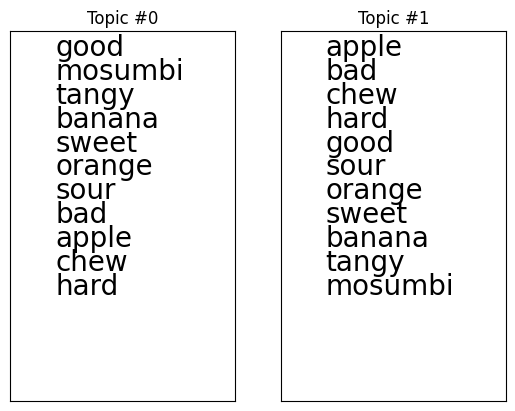

In [ ]:
word_topic = np.array(lda_model.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 15
vocab_array = np.asarray(ColumnNames)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 20

for t in range(NUM_TOPICS):
    plt.subplot(1, NUM_TOPICS, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.2, num_top_words-i-0.5, word, fontsize=fontsize_base)
                 ##fontsize_base*share)

#plt.tight_layout()
#plt.show()
plt.savefig("TopicsVis.pdf")

# R Code

# ARM CODE WILL WORK IN R STUDIO OR Conda bur not on Colab

In [ ]:
install.packages("arules")

install.packages("devtools")
library(devtools)

install.packages("TSP")

install.packages("data.table")

install.packages("sp")

install.packages("arulesViz", dependencies = TRUE)

install.packages("datasets.load")

library("devtools")
install_github("mhahsler/arulesViz")

install.packages("dplyr", dependencies = TRUE)
install.packages("purrr", dependencies = TRUE)
install.packages("devtools", dependencies = TRUE)
install.packages("tidyr")

install_github("mhahsler/arulesViz")


In [ ]:
library(arules)
library(arulesViz)

In [ ]:
ABARM <- read.transactions("D:/Boulder/Machine Learning/ARMData.csv",
                           rm.duplicates = FALSE,
                           format = "basket",  ##if you use "single" also use cols=c(1,2)
                           sep=",",  ## csv file
                           cols=1, skip = 1)

In [ ]:
FirstRule = arules::apriori(ABARM, parameter = list(support=0.1,
                                                    confidence =0.9,
                                                    minlen=2))

In [ ]:
inspect(FirstRule)

SortedRules1 <- sort(FirstRule, by="support", decreasing=TRUE)
inspect(SortedRules1[1:30])
(summary(SortedRules1))
plot(SortedRules1, method="graph", engine="htmlwidget")
plot(SortedRules1)

In [ ]:
SecondRule = arules::apriori(ABARM, parameter = list(confidence =0.9,
                                                     minlen=2))

inspect(SecondRule)



In [ ]:
plot(SortedRules, method="graph", engine="htmlwidget")

# Hierarchical clustering

## Euclidean Distance

In [ ]:
d = read.csv("")

head(d)

d <- na.omit(d)

d1 = d[,3:10]

d$Campaign.Name <- gsub("Campaign", " ", as.character(d$Campaign.Name))

head(d1)

d2 <- scale(d1)

library(dplyr)

head(d2)

labels <- 0

labels <- paste(d$Campaign.Name, 1:length(d[,1]), sep = "_")

rownames(d2) <- labels

dist_mat <- dist(d2, method = 'euclidean')

length(dist_mat)

hclust_avg <- hclust(dist_mat, method = 'average')
plot(hclust_avg)



### Cosine Distance

In [ ]:
(My_m <- (as.matrix((t(d2)))))

(My_cosine_dist = 1-crossprod(My_m) /(sqrt(colSums(My_m^2)%*%t(colSums(My_m^2)))))



My_cosine_dist <- as.dist(My_cosine_dist)
HClust_Ward_CosSim_SmallCorp2 <- hclust(My_cosine_dist, method = "ward.D")

plot(HClust_Ward_CosSim_SmallCorp2, cex = 0.7, hang = -30, main = "Cosine Sim")

rect.hclust(HClust_Ward_CosSim_SmallCorp2, k = 2)